## Multiple graphs in adjacent boxes
Feat. labels on graph colummns

Text(0, 0.5, 'HeightOfTree_m')

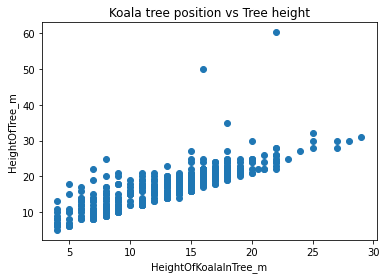

In [1]:
# Charts from last week

import pandas as pd 
import matplotlib.pyplot as plt

koala_data = pd.read_csv('data/koala_sightings_data.csv') 

tree_heights = koala_data['HeightOfTree_m']
koala_heights = koala_data['HeightOfKoalaInTree_m']

plt.scatter(koala_heights, tree_heights)
plt.title('Koala tree position vs Tree height')
plt.xlabel('HeightOfKoalaInTree_m')
plt.ylabel('HeightOfTree_m')


LGA
Brisbane City     66
Gold Coast        53
Ipswich           39
Logan             24
Logan City        25
Moreton Bay      233
Noosa              7
Redland City     202
Name: _id, dtype: int64
[('Brisbane City', 66), ('Gold Coast', 53), ('Ipswich', 39), ('Logan', 24), ('Logan City', 25), ('Moreton Bay', 233), ('Noosa', 7), ('Redland City', 202)]


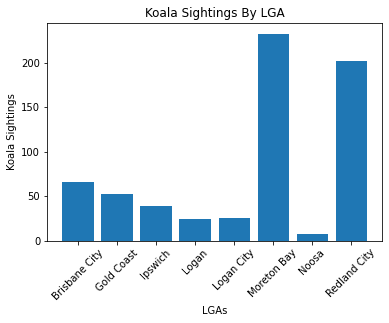

In [2]:
# Prepare the data, count the number of Koalas in each suburb

# Prepare the data, count the number of Koalas in each suburb

import pandas as pd 

koala_data = pd.read_csv('data/koala_sightings_data.csv') 
koala_sighting_count = koala_data.groupby('LGA')["_id"].count()
print(koala_sighting_count)

print(list(koala_sighting_count.items()))

# Make the bar chart

import matplotlib.pyplot  as plt

x = koala_sighting_count.keys()
y = koala_sighting_count.values

# Make it a vertical bar chart
plt.bar(x, y)

plt.xticks(rotation = 45)
plt.title('Koala Sightings By LGA')
plt.xlabel('LGAs')
plt.ylabel('Koala Sightings')

plt.savefig('foo.png', bbox_inches='tight')

plt.show()



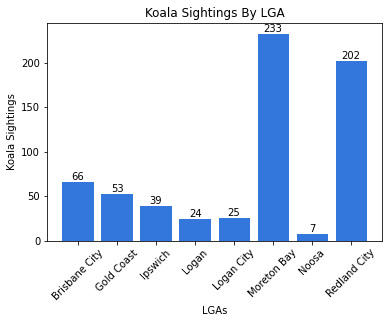

In [5]:
# Prepare the data, count the number of Koalas in each suburb


# Make the bar chart

import matplotlib.pyplot  as plt

##
# Change to subplots
##
fig, ax = plt.subplots()

x = koala_sighting_count.keys()
y = koala_sighting_count.values


# Make it a vertical bar chart
hbars = ax.bar(x, y, color="#3377dd")

plt.xticks(rotation = 45)
plt.title('Koala Sightings By LGA')
plt.xlabel('LGAs')
plt.ylabel('Koala Sightings')

ax.bar_label(hbars, y)

plt.show()



In [ ]:
# Make the bar chart



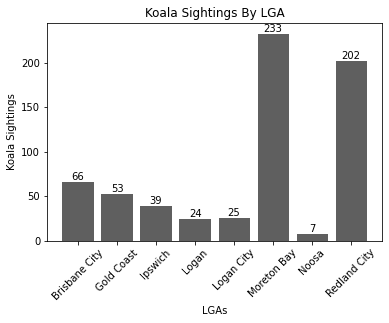

In [179]:

##
# Change to subplots
##
fig, ax = plt.subplots()


x = koala_sighting_count.keys()
y = koala_sighting_count.values

##
# Add a colour
##
hbars = ax.bar(x, y, color="#5f5f5f")

plt.xticks(rotation = 45)
plt.title('Koala Sightings By LGA')
plt.xlabel('LGAs')
plt.ylabel('Koala Sightings')

##
# Add the labels
##
ax.bar_label(hbars, y)

plt.show()



## Side By side graph

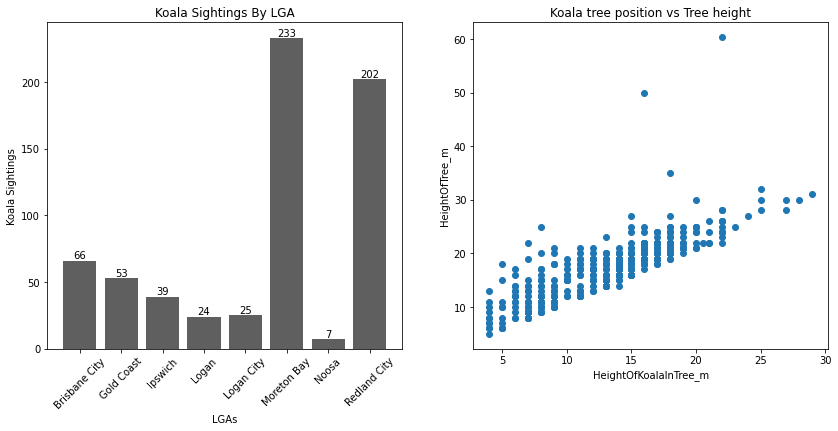

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# figure(figsize=(14, 6), dpi=80)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

## Plot 1 - Bar chart
plt.subplot(1, 2, 1)
plt.bar(x, y, color="#5f5f5f")
plt.xticks(rotation = 45)
plt.title('Koala Sightings By LGA')
plt.xlabel('LGAs')
plt.ylabel('Koala Sightings')
ax1.bar_label(hbars, y)

## Plot 2 - scatter plot
plt.subplot(1, 2, 2)

plt.scatter(koala_heights, tree_heights)
plt.title('Koala tree position vs Tree height')
plt.xlabel('HeightOfKoalaInTree_m')
plt.ylabel('HeightOfTree_m')

plt.show()

## Bar charts next to each other

Koala sexes (by LGA)


In [12]:
import pandas as pd 
import matplotlib.pyplot  as plt

koala_data = pd.read_csv('data/koala_sightings_data.csv') 
koala_females = koala_data.query("Sex == 'F'").groupby('LGA')["_id"].count()
koala_males = koala_data.query("Sex == 'M'").groupby('LGA')["_id"].count()

print(koala_females)
print(koala_males)


LGA
Brisbane City     35
Gold Coast        18
Ipswich           29
Logan             10
Logan City        13
Moreton Bay      104
Noosa              1
Redland City      99
Name: _id, dtype: int64
LGA
Brisbane City    22
Gold Coast       16
Ipswich           7
Logan            12
Logan City       10
Moreton Bay      75
Noosa             4
Redland City     71
Name: _id, dtype: int64


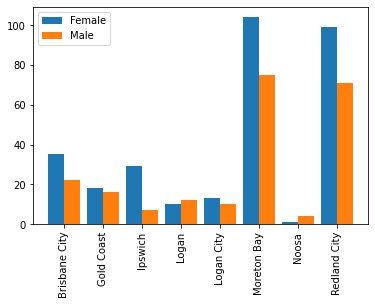

In [13]:
labels = koala_sighting_count.keys()
f = koala_females.values
m = koala_males.values

# Generate the spots for the labels
x_axis = np.arange(len(labels))

# Add 2 sereis of data
plt.bar(x_axis -0.2, f, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, m, width=0.4, label = 'Male')
plt.xticks(x_axis, labels) # Labels go on the spots, in the centre of each pair
plt.xticks(rotation = 90)

# Add legend
plt.legend()

plt.show()


## Stacked bar chart

Koala sex, stacked (by LGA)

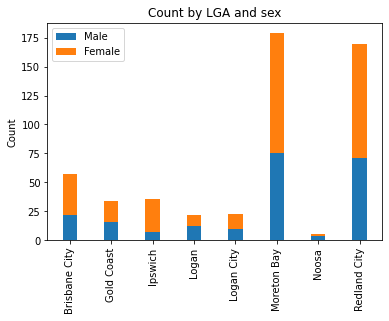

In [14]:
width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, m, width, label='Male')
# We set the female charts to have a different bottom (not 0), the start where the Male charts finish.
ax.bar(labels, f, width, bottom=m, label='Female')

ax.set_ylabel('Count')
ax.set_title('Count by LGA and sex')
plt.xticks(rotation = 90)
ax.legend()

plt.show()

### Would look better as percentages
Apply some quick pandas magic

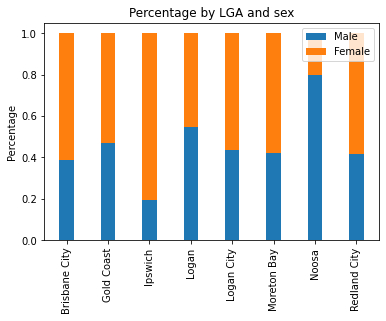

In [15]:
# Calculate, totals and apply to get perecntages for females and males
totals = koala_females + koala_males

f_percent = koala_females / totals
m_percent = koala_males / totals

# Same again
width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, m_percent, width, label='Male')
ax.bar(labels, f_percent, width, bottom=m_percent, label='Female')

# change the labels
ax.set_ylabel('Percentage')
ax.set_title('Percentage by LGA and sex')
plt.xticks(rotation = 90)
ax.legend()

plt.show()

##  Overlay Bar + scatter plot

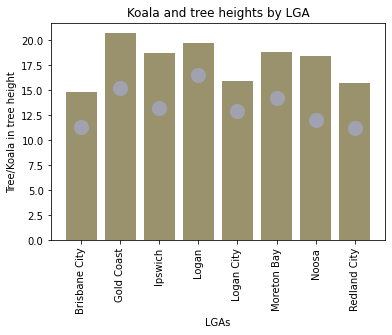

In [18]:
# Get the 2 series of data
tree_heights_mean = koala_data.groupby('LGA')["HeightOfTree_m"].mean()
koala_in_tree_heights_mean = koala_data.groupby('LGA')["HeightOfKoalaInTree_m"].mean()

# Plot a column graph - height of trees
fig, ax = plt.subplots()
x = tree_heights_mean.keys()
y = tree_heights_mean.values
hbars = ax.bar(x, y, color="#99926d")

# Plot a scatter plot - height of Koalas
k_x = koala_in_tree_heights_mean.keys()
k_y = koala_in_tree_heights_mean.values

plt.scatter(k_x, k_y, color="#a0a2b0", s=200)


# axies labels, etc
plt.xticks(rotation = 90)
plt.title('Koala and tree heights by LGA')
plt.xlabel('LGAs')
plt.ylabel('Tree/Koala in tree height')

plt.show()

## 3D graphs

### 3D Bar chart

Text(0.5, 0.92, 'Mean Tree hieghts by LGA')

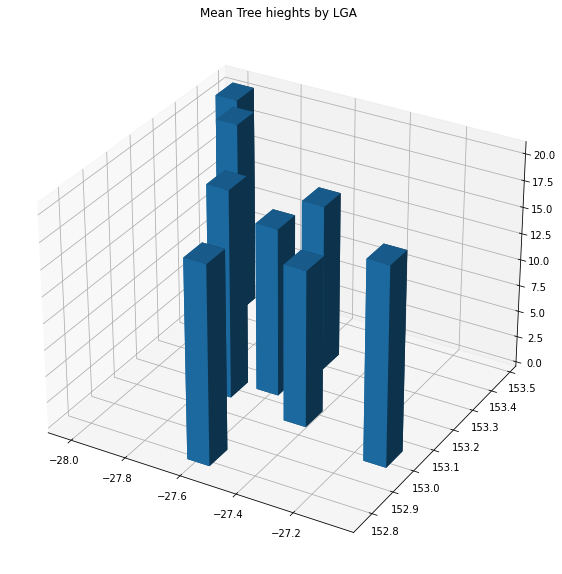

In [22]:
# Lat and long for each LGA
latlon = {'Logan City': (-27.639168, 153.109451), 
          'Redland City': (-27.593294, 153.266418),
          'Brisbane City': (-27.470125, 153.021072),
          'Moreton Bay': (-27.142202596694993, 152.96333732371176),
          'Ipswich': (-27.616667, 152.766663), 
          'Logan': (-27.76326, 153.04530), 
          'Gold Coast': (-28.016666, 153.399994),
          'Noosa': (-28.016666, 153.399994)
          }

import numpy as np
import matplotlib.pyplot as plt

tree_heights_mean = koala_data.groupby('LGA')["HeightOfTree_m"].mean()

lgas = tree_heights_mean.keys()
heights = tree_heights_mean.values
lats = []
longs = []

for lga in lgas:
    lat, long = latlon[lga]
    lats.append(lat)
    longs.append(long)

# setup the figure and axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

bottom = np.zeros_like(lats)
width = 0.08
depth = 0.08

ax.bar3d(lats, longs, bottom, width, depth, heights, shade=True)
ax.set_title('Mean Tree hieghts by LGA')

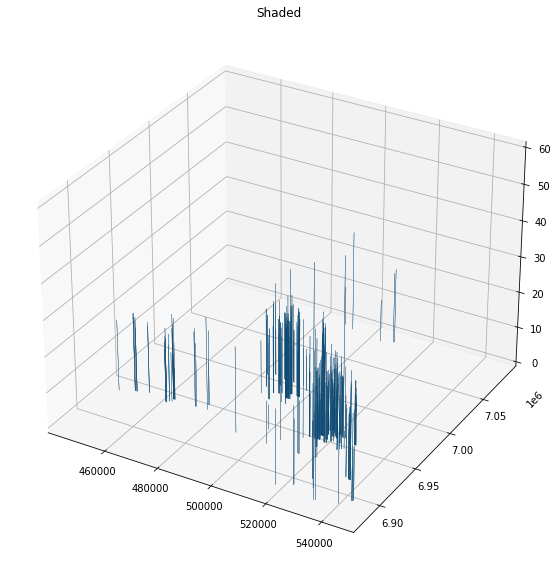

In [23]:
data = koala_data[koala_data[["HeightOfTree_m", "Eastings", "Northings"]].notnull().all(1)][["HeightOfTree_m", "Eastings", "Northings"]]
# print(data)

heights = data["HeightOfTree_m"].values
eastings = data["Eastings"].values
northings = data["Northings"].values

# setup the figure and axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

bottom = np.zeros_like(eastings)
width = 100
depth = 100

ax.bar3d(eastings, northings, bottom, width, depth, heights, shade=True)
ax.set_title('Shaded')
plt.show()

## 3D Trianglated Surface

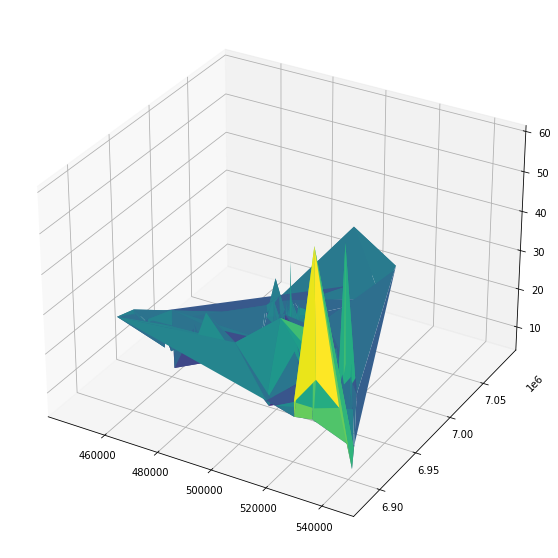

In [24]:
data = koala_data[koala_data[["HeightOfTree_m", "Eastings", "Northings"]].notnull().all(1)][["HeightOfTree_m", "Eastings", "Northings"]]
# print(data)

heights = data["HeightOfTree_m"].values
eastings = data["Eastings"].values
northings = data["Northings"].values

# print(eastings)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_trisurf(eastings, northings, heights,cmap='viridis', edgecolor='none')
plt.show()

[[-0.14550003  0.37711637  0.77158563  0.97300878  0.98281051  0.84395529
   0.61482584  0.35018219  0.09128874 -0.13645656 -0.32132971 -0.46118753
  -0.55925174 -0.62065892 -0.6500367  -0.6500367  -0.62065892 -0.55925174
  -0.46118753 -0.32132971 -0.13645656  0.09128874  0.35018219  0.61482584
   0.84395529  0.98281051  0.97300878  0.77158563  0.37711637 -0.14550003]
 [ 0.37711637  0.79522584  0.98773718  0.95538608  0.75287196  0.45459318
   0.12910458 -0.17404272 -0.42710005 -0.62065892 -0.75773327 -0.84791098
  -0.90277665 -0.93286355 -0.94589175 -0.94589175 -0.93286355 -0.90277665
  -0.84791098 -0.75773327 -0.62065892 -0.42710005 -0.17404272  0.12910458
   0.45459318  0.75287196  0.95538608  0.98773718  0.79522584  0.37711637]
 [ 0.77158563  0.98773718  0.94345884  0.70065489  0.35018219 -0.02273185
  -0.35712049 -0.62065892 -0.80515239 -0.91848491 -0.97669508 -0.99794535
  -0.99874851 -0.99205554 -0.98655193 -0.98655193 -0.99205554 -0.99874851
  -0.99794535 -0.97669508 -0.9184849

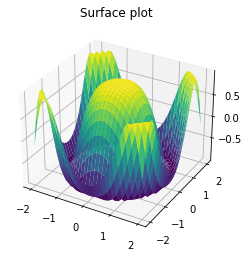

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)
print(z)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()